# Метрические методы
Шестаков А.В. Майнор по анализу данных 31/05/2016

Метрические методы классификации и регрессии - одни из самых простых моделей. Они основаны на гипотезе о компактности (непрерывности) - близким объектам соответствуют близкие ответы.

Дело остаётся за малым: 
* Определить, что же такое близкий объект
* Определить, сколько ближайших соседей учитывать при прогнозировании
* Определить как их учитывать?

Какие недостатки метода kNN вы помните из лекции?

## Интуиция
### Классификация
Поиграем с kNN на игружечном датасете

In [3]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

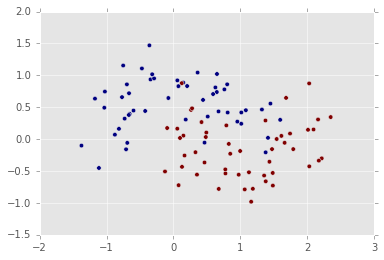

In [6]:
X, y = make_moons(noise=0.3, random_state=123)
plt.scatter(X[:,0], X[:,1], c=y)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X, y)

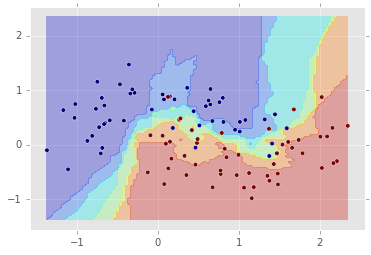

In [32]:
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)

Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
Y = Y.reshape(xx1.shape)

plt.contourf(xx1, xx2, Y, alpha=0.3)
plt.scatter(X[:,0], X[:,1],c=y)

### Регрессия
Загрузите простой [датасет](https://www.dropbox.com/s/ow82e7paghozork/kengo.csv?dl=0) с измерениями носов(?) кенгуру. 
*Reference: Australian Journal of Zoology, Vol. 28, p607-613*

In [51]:
data = np.loadtxt('kengo.csv', skiprows=1, delimiter=',')
X = data[:,0].reshape(-1,1)
y = data[:,1]

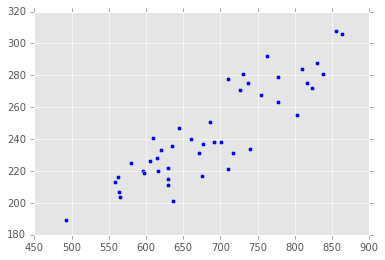

In [52]:
plt.scatter(X, y)

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform')
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [63]:
x_range = np.linspace(min(X), max(X), 100).reshape(-1,1)
y_hat = knn.predict(x_range)

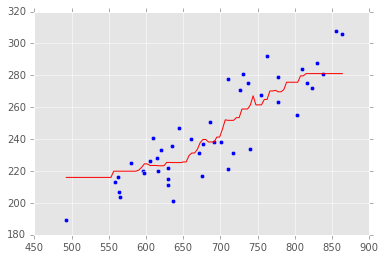

In [64]:
plt.scatter(X, y)
plt.plot(x_range, y_hat, 'r')

# Задание 1
## Регрессия

Обучите метод ближайшего соседа на данных о стоимости апартаментов в Бостоне.<br/>
С помощью кросс-валидации определите оптимальное количество ближайших соседей и функцию расчета весов ближайших соседей

In [66]:
from sklearn.datasets import load_boston
data = load_boston()

In [67]:
print data['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [70]:
X = data.data
y = data.target

## Классификация
Загрузите датасет с новостными текстами. Выберите 2 категории, разбейте документы на слова (n-gramm'ы), "обучите" метод ближайшего соседа для задачи категоризации текстов по их содержанию.

Используйте косинусную мету близости

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
news_docs = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'comp.graphics'])